## Randomforest

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier  
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [16]:
df = pd.read_csv('20_dataset_3.csv')

## EDA

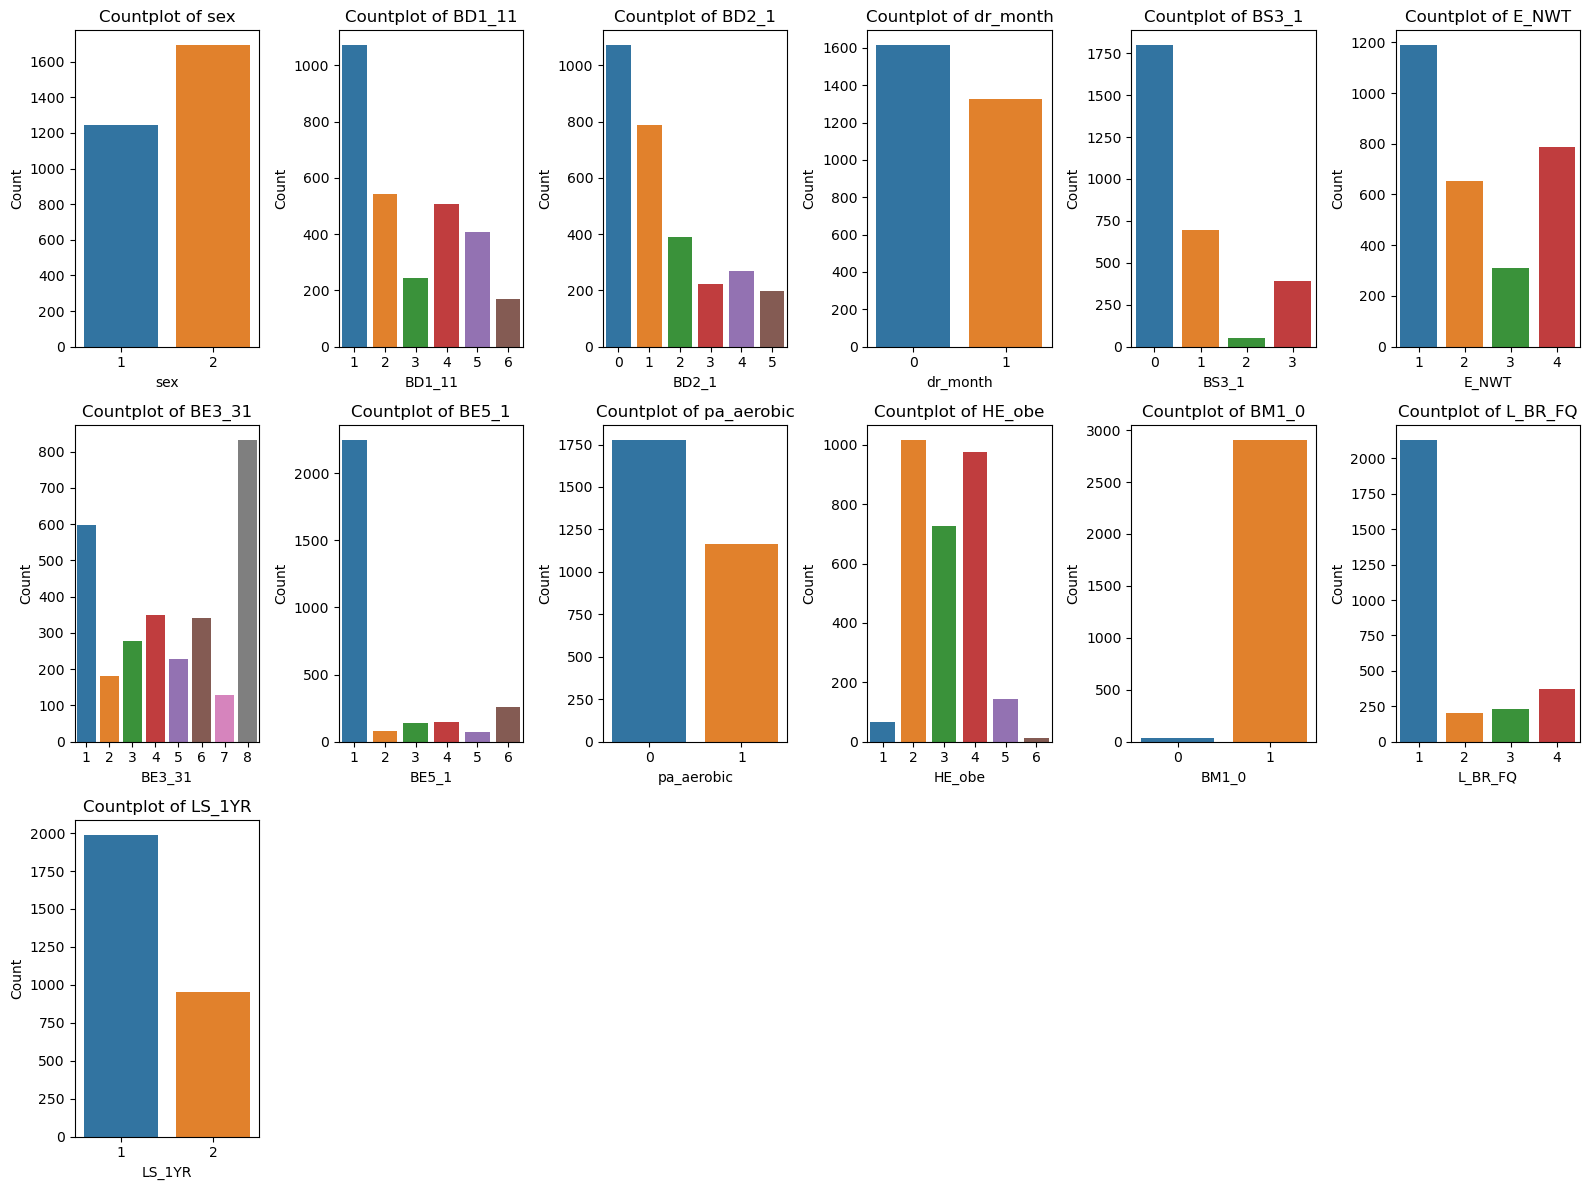

In [23]:
categorical_cols = ['sex', 'BD1_11', 'BD2_1', 'dr_month', 'BS3_1', 'E_NWT', 'BE3_31', 'BE5_1', 'pa_aerobic', 'HE_obe', 'BM1_0', 'L_BR_FQ', 'LS_1YR']

num_cols = len(categorical_cols)
num_rows = (num_cols + 1) // 6 + 1
fig, axes = plt.subplots(num_rows, 6, figsize=(16, 4 * num_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    ax = axes[i]
    sns.countplot(x=col, data=df, ax=ax)
    ax.set_title(f'Countplot of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')


if num_cols % 6 != 0:
    for j in range(num_cols % 6, 6):
        fig.delaxes(axes[-j])

fig.tight_layout()
plt.show()

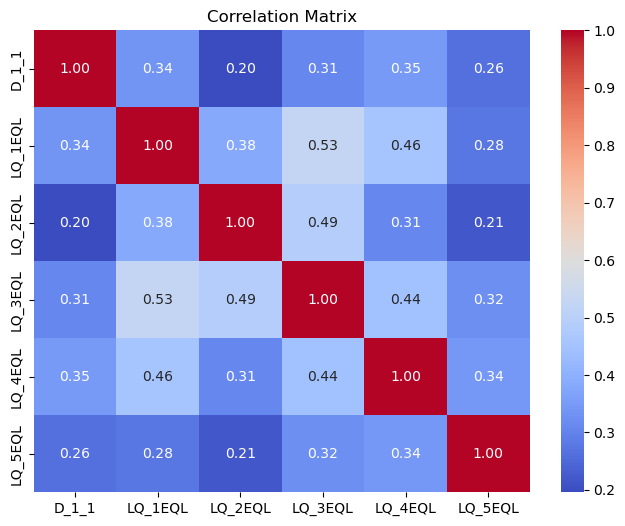

In [17]:
corr_matrix = df[['D_1_1', 'LQ_1EQL', 'LQ_2EQL', 'LQ_3EQL', 'LQ_4EQL', 'LQ_5EQL']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## LQ_1EQL

In [18]:
x = df[['BE5_1','BE8_1','BE3_31','BE3_32', 'pa_aerobic', 'HE_obe']]
y = df['LQ_1EQL']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.5, random_state=0)

training_accuracy = []
test_accuracy = []

n_settings = [50, 100, 200]          #number of trees 

for n in n_settings:
        
        forest = RandomForestClassifier(n_estimators=n, random_state=0)
        forest.fit(X_train, y_train)
    
        y_train_hat = forest.predict(X_train)
        y_test_hat = forest.predict(X_test)
    
        training_accuracy.append(accuracy_score(y_train, y_train_hat))
        test_accuracy.append(accuracy_score(y_test, y_test_hat))
    
pd.DataFrame({"n_estimators":sorted(n_settings), "training accuracy": training_accuracy, "test accuracy": test_accuracy})

,n_estimators,training accuracy,test accuracy
0,50,0.922396,0.788972
1,100,0.923077,0.789653
2,200,0.923077,0.791014


## LQ_3EQL

In [20]:
x3 = df[['BP16_1','E_NWT','L_BR_FQ','LS_1YR','BD1_11','BS3_1']]
y3 = df['LQ_3EQL']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    x3, y3, test_size=0.25, random_state=0)

training_accuracy = []
test_accuracy = []

n_settings = [50, 100, 200]          #tree의 개수

for n in n_settings:
        
        forest = RandomForestClassifier(n_estimators=n, random_state=0)
        forest.fit(X_train, y_train)
    
        y_train_hat = forest.predict(X_train)
        y_test_hat = forest.predict(X_test)
    
        training_accuracy.append(accuracy_score(y_train, y_train_hat))
        test_accuracy.append(accuracy_score(y_test, y_test_hat))
    
pd.DataFrame({"n_estimators":sorted(n_settings), "training accuracy": training_accuracy, "test accuracy": test_accuracy})

,n_estimators,training accuracy,test accuracy
0,50,0.941443,0.904762
1,100,0.941897,0.906122
2,200,0.941897,0.902041
